In [1]:
from vision.ssd.vgg_ssd import create_vgg_ssd, create_vgg_ssd_predictor
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.ssd.mobilenetv1_ssd_lite import create_mobilenetv1_ssd_lite, create_mobilenetv1_ssd_lite_predictor
from vision.ssd.squeezenet_ssd_lite import create_squeezenet_ssd_lite, create_squeezenet_ssd_lite_predictor
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite, create_mobilenetv2_ssd_lite_predictor
from vision.utils.misc import Timer
import cv2
import sys
import os
import matplotlib.pyplot as plt
# if len(sys.argv) < 5:
#     print('Usage: python run_ssd_example.py <net type>  <model path> <label path> <image path>')
#     sys.exit(0)




In [2]:
def pred(net_type, model_path, label_path, image_path):
    class_names = [name.strip() for name in open(label_path).readlines()]

    if net_type == 'vgg16-ssd':
        net = create_vgg_ssd(len(class_names), is_test=True)
    elif net_type == 'mb1-ssd':
        net = create_mobilenetv1_ssd(len(class_names), is_test=True)
    elif net_type == 'mb1-ssd-lite':
        net = create_mobilenetv1_ssd_lite(len(class_names), is_test=True)
    elif net_type == 'mb2-ssd-lite':
        net = create_mobilenetv2_ssd_lite(len(class_names), is_test=True)
    elif net_type == 'sq-ssd-lite':
        net = create_squeezenet_ssd_lite(len(class_names), is_test=True)
    else:
        print("The net type is wrong. It should be one of vgg16-ssd, mb1-ssd and mb1-ssd-lite.")
        sys.exit(1)
    net.load(model_path)

    if net_type == 'vgg16-ssd':
        predictor = create_vgg_ssd_predictor(net, candidate_size=200)
    elif net_type == 'mb1-ssd':
        predictor = create_mobilenetv1_ssd_predictor(net, candidate_size=200)
    elif net_type == 'mb1-ssd-lite':
        predictor = create_mobilenetv1_ssd_lite_predictor(net, candidate_size=200)
    elif net_type == 'mb2-ssd-lite':
        predictor = create_mobilenetv2_ssd_lite_predictor(net, candidate_size=200)
    elif net_type == 'sq-ssd-lite':
        predictor = create_squeezenet_ssd_lite_predictor(net, candidate_size=200)
    else:
        predictor = create_vgg_ssd_predictor(net, candidate_size=200)

    orig_image = cv2.imread(image_path)
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
    boxes, labels, probs = predictor.predict(image, 10, 0.4)
    # print(boxes)
    for i in range(boxes.size(0)):
        box = boxes[i, :].numpy().astype(int)
        print(box)
        cv2.rectangle(orig_image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
        #label = f"""{voc_dataset.class_names[labels[i]]}: {probs[i]:.2f}"""
        label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
        cv2.putText(orig_image, label,
                    (box[0] + 20, box[1] + 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,  # font scale
                    (255, 0, 255),
                    2)  # line type
    # path = "run_ssd_example_output.jpg"
    # cv2.imwrite(path, orig_image)
    print(f"Found {len(probs)} objects.")
    return orig_image


[364 459 509 586]
[336  85 417 157]
Found 2 objects.
[330 398 529 633]
[719 719 939 951]
[ -31   31 1019  989]
Found 3 objects.


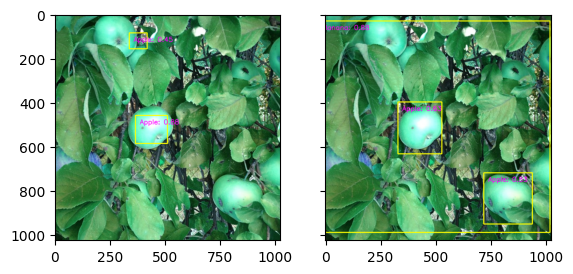

In [5]:
net_type = 'mb1-ssd'
model_path1 = 'models/Jan20_copy/mb1-ssd-Epoch-29-Loss-13.894265174865723.pth'

model_path2 = 'models/Jan19ODI/mb1-ssd-Epoch-29-Loss-3.796029249827067.pth'

# model_path2 = '/u/31/gudah1/unix/Downloads/BFMC/BFMC2023/catkin_ws/src/perception/sign_light_ped_detection_ssd/src/ref/models/Jan19/mb1-ssd-Epoch-29-Loss-3.2544614473978677.pth'
label_path = 'models/Jan20_copy/labels.txt'
path = 'dataset/Jan20_copy/JPEGImages/'
dir_list = os.listdir(path)
# image_path = sys.argv[4]
i = 0
image_path = path+dir_list[i]

img1 = pred(net_type, model_path1, label_path, image_path)
img2 = pred(net_type, model_path2, label_path, image_path)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(img1)
# ax1.set_title('Sharing Y axis')
ax2.imshow(img2)
# plt.imshow(img)